#**Image Classification: Predicting Cats or Dogs using Image Processing**

*created by Syed Ali Hamza Shah,
ID 22102368*

#Introduction

The image recognition task requires a labeled dataset of cat and dog images. The dataset consists of 10,000 train images and a corresponding with 10,000 entries in train.csv. The feature selection is divided into 5 featuring models(FM1,FM2,FM3,FM4,FM5) for each feature models, this report compares with 3 machine learning models(Random forest, Naive base and Gradiant boosting).

The machine learning models will be trained using this dataset to predict the presence of a cat or a dog in an image.

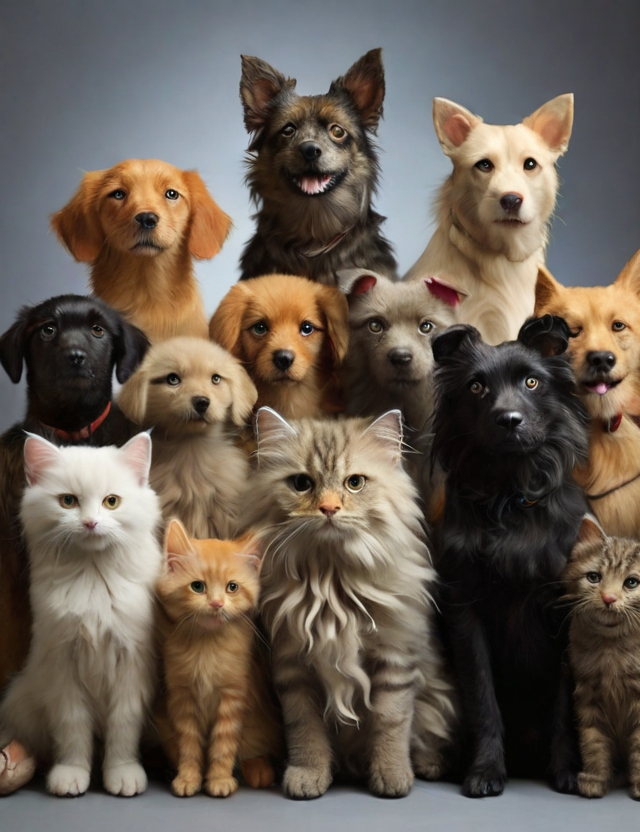

# Libraries
Imported key libraries for image processing, machine learning, and evaluation.

Additional libraries are Image feature extraction, Machine Learning algorithms, and data visualization using OpenCV, scikit-learn, and Matplotlib/Seaborn.

The random seed is set for result reproducibility.

In [ ]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
from random import seed
RANDOM_SEED = 100


#Data Loading

Using Google Drive, the data has been loaded.

In [ ]:
from google.colab import drive # mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip the dataset by using 'shutil' library

In [ ]:
import shutil # unzip file
shutil.unpack_archive('/content/drive/MyDrive/Python/Dataset fot 2nd task/data.zip', 'zip')

Loading the folder of dataset

In [ ]:
data_folder = '/content/zip' #load the folder

Load and summarize training data

In [ ]:
df_train = pd.read_csv(os.path.join(data_folder, '/content/zip/train.csv')) # load training data

print(f'Number of entries: {len(df_train)}') # summarise the details
df_train.head()

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


Load and summarize test data

In [ ]:
df_test = pd.read_csv(os.path.join(data_folder, '/content/zip/test.csv'))
df_test.head()

,id
0,1
1,2
2,3
3,4
4,5


#Data Processing

It involves visualizing the dataset, confirming that the dataset doesn't require cleaning, and defining a concise function **preprocess_image** to handle the pre-processing of images using OpenCV, including optional resizing.

##Visualize label distribution

dog    5011
cat    4989
Name: label, dtype: int64


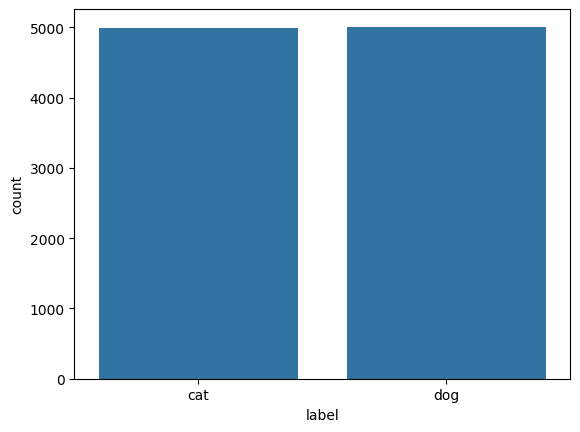

In [ ]:
sns.countplot(x='label', data=df_train) #made count plot
label_count = df_train['label'].value_counts()
print(label_count)

##Pre-processing


The code defines a function **preprocess_image** that loads and preprocesses images based on given IDs from a specified folder path. It uses OpenCV for image operations, including optional resizing if a dimension.

In [ ]:
def preprocess_image(ids, folder_path, dim=None):

  images = []
  for id in tqdm(ids): # tqdm function is used for progress tracking.
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)
    if dim is not None: # Resize if necessary
      if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
        img = cv2.resize(img, dim)
    images.append(img)
  return images

Using a base dimension of (210, 210). The code loads and preprocesses training testing images from 'train_images' and 'test_images' folders.

In [ ]:
base_dim = (210, 210)

train_image_folder = os.path.join(data_folder, 'train_images') # load train images
train_images = preprocess_image(df_train['id'], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

test_image_folder = os.path.join(data_folder, 'test_images') # load test images
test_images = preprocess_image(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

100%|██████████| 10000/10000 [00:32<00:00, 311.23it/s]


Number of training images loaded: 10000


100%|██████████| 1000/1000 [00:03<00:00, 254.40it/s]

Number of testing images loaded: 1000


#Model Evaluation
The evaluation funtion covers.

*   Actuals: list of actual labels.
*   Predictions: list of predicted labels.
*   Class_names: list of classes used for the model/classification task.

It also calculates **accuracy** and displays a **confusion matrix** code to use for the machine learning models.





In [ ]:
def evaluate(actuals, predictions, class_names): # method to calculate evaluation results accuracy and confusion matrix
  accuracy = metrics.accuracy_score(actuals, predictions)# calculate accuracy
  print(f'Accuracy: {accuracy}')

  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names) # plot confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
  disp.plot()
  plt.show()

#Model Development

There are three machine learning models used in this notebook to compare and select the best model.

##Random Forest Model

In [ ]:
def get_random_forest_predictions(X_train, X_val, y_train, y_val): # method to train and predict using Random Forest classifier

    clf = RandomForestClassifier(random_state=RANDOM_SEED) # build model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val) # Make predictions on test data

    evaluate(y_val, y_pred, clf.classes_) # evaluation
    return clf


##Gradient Boosting classifier


In [ ]:
def get_gradient_boosting_predictions(X_train, X_val, y_train, y_val): # Method to train and predict using Gradient Boosting classifier

    clf = GradientBoostingClassifier(random_state=RANDOM_SEED) # Build model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val) # Make predictions on test data
    # Evaluation
    evaluate(y_val, y_pred, clf.classes_)

    return clf


##Naive Bayes classifier

In [ ]:
def get_naive_bayes_predictions(X_train, X_val, y_train, y_val): # method to train and predict using Naive Bayes classifier
    # build model
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val) # Make predictions on test data

    evaluate(y_val, y_pred, clf.classes_) # evaluation

    return clf


#Feature Selection and Result

The feature selection is divided into 5 featuring models namely FM1, FM2, FM3, FM4 and FM5.

These all feature selection models are compared to three machine learning models.

## FM1


*   **Preprocessing** - gray scaling,
*   **Features** - image vector,
*   **Algorithm** - Random forest, Gradiant Boosting and Naive bayes.







In [ ]:
def get_features_m1(images): # Method to extract image features

    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Image preprocessing - gray scaling
        # Image vectorization/feature extraction
        features = img_grayscaled.flatten()
        features_list.append(features)
    features_list = np.array(features_list)
    return features_list


In [ ]:
features_train = get_features_m1(train_images) # feature extraction
print(features_train.shape)

(10000, 40000)


In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

Random Forest
Accuracy: 0.6073333333333333


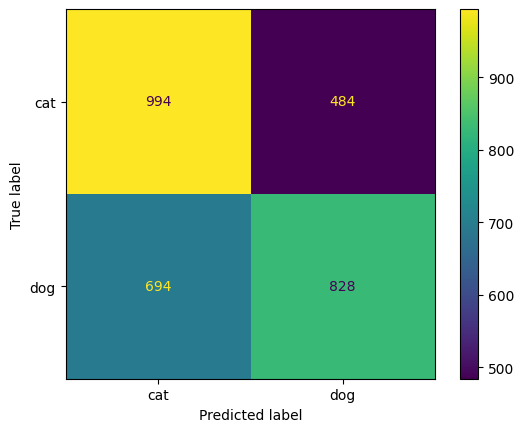

Gradient Boosting
Accuracy: 0.634


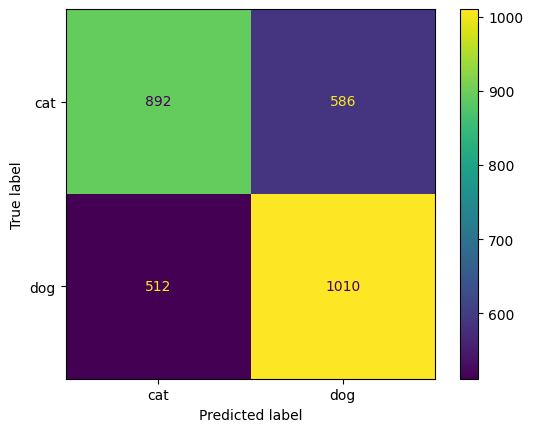

Naive Bayes
Accuracy: 0.572


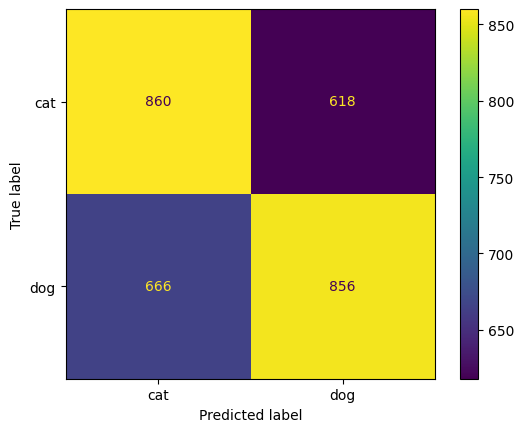

In [ ]:
# Train three models

print("Random Forest")
rf_m1 = get_random_forest_predictions(X_train, X_val, y_train, y_val)

print("Gradient Boosting")
gb_m1 = get_gradient_boosting_predictions(X_train, X_val, y_train, y_val)

print("Naive Bayes")
nb_m1 = get_naive_bayes_predictions(X_train, X_val, y_train, y_val)

## FM2
- Preprocessing - gray scaling, smoothing
- Features - image vector
- Algorithm - Random forest, Gradiant Boosting and Naive bayes.

Image Id: 2386
Image Id: 7528
Image Id: 7453
Image Id: 2863
Image Id: 6439


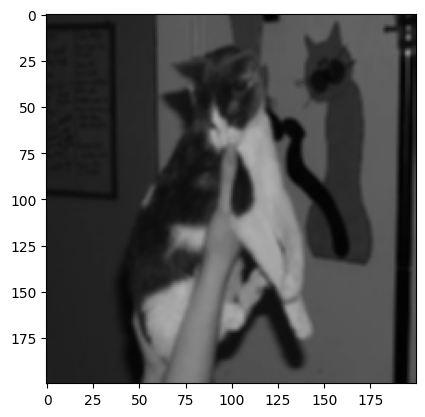

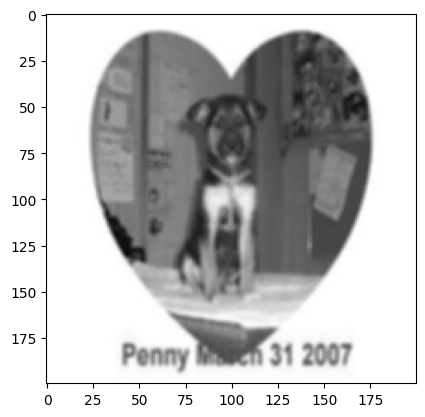

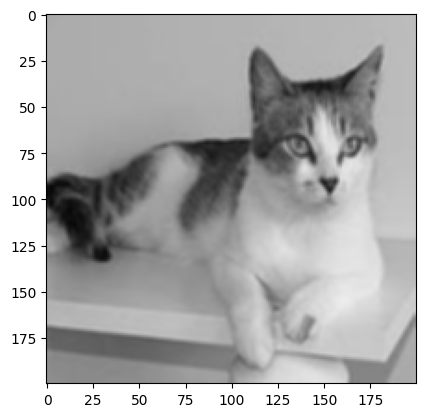

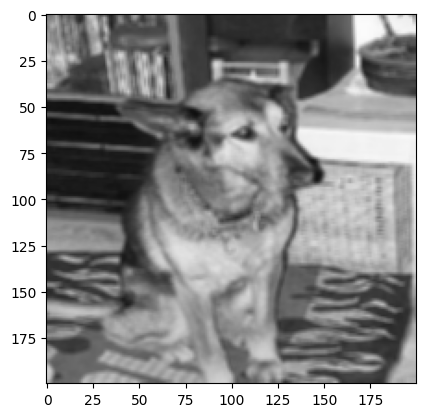

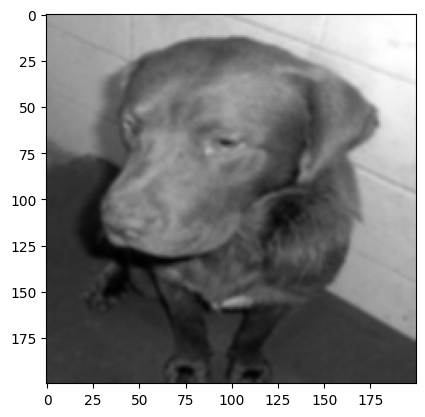

In [ ]:
seed(RANDOM_SEED)
sample_images = []

for i in range(5): # pick a random sample of images
  value = randint(0, len(train_images)-1)
  print(f'Image Id: {value}')
  sample_images.append(train_images[value])

for img in sample_images: # apply preprocessing and show output images
  img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

  plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
def get_features_m2(images): # Method to extract image features with additional preprocessing
    """
    Extracts features from a list of images with gray scaling and smoothing.

    Parameters:
    - images: List of input images.
    """
    features_list = []
    for img in images:
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Image preprocessing - gray scaling + smoothing
        img_blurred = cv2.GaussianBlur(img_grayscaled, (3, 3), 2)
        features = img_blurred.flatten() # Image vectorization/feature extraction
        features_list.append(features)
    features_list = np.array(features_list)
    return features_list


In [ ]:
features_train = get_features_m2(train_images) # feature extraction
print(features_train.shape)

(10000, 40000)


Random Forest
Accuracy: 0.61


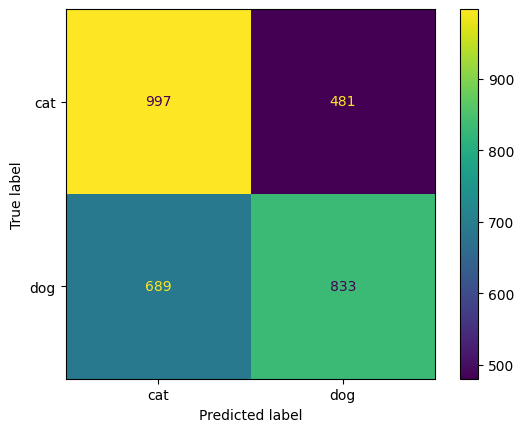

Gradient Boosting
Accuracy: 0.6353333333333333


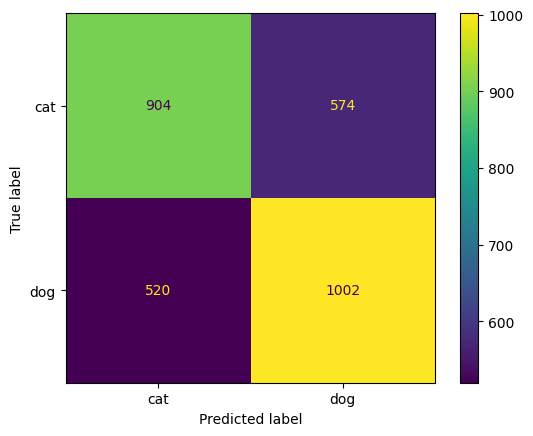

Naive Bayes
Accuracy: 0.5713333333333334


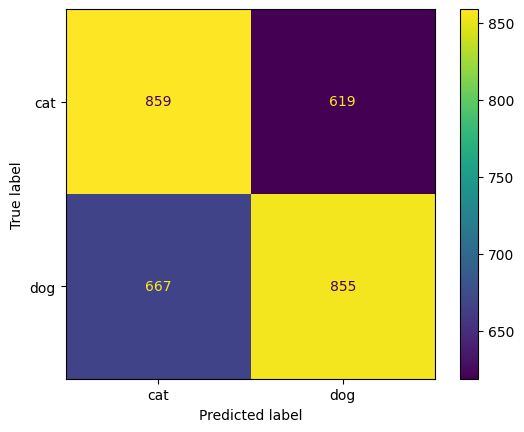

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train three models

print("Random Forest")
rf_m2 = get_random_forest_predictions(X_train, X_val, y_train, y_val)

print("Gradient Boosting")
gb_m2 = get_gradient_boosting_predictions(X_train, X_val, y_train, y_val)

print("Naive Bayes")
nb_m2 = get_naive_bayes_predictions(X_train, X_val, y_train, y_val)

## FM3
In the FM3, the Canny edge detection algorithm is employed for edge detection.

*   Preprocessing - gray scaling
*   Features - edge map to vector

*   Algorithm - Random forest, Gradiant Boosting and Naive bayes.


In [ ]:
# Method to extract image features using Canny edges
def get_features_m3(images):
    """
    Extracts features from a list of images using Canny edge detection.
    Parameters:
               - images: List of input images.
    """
    features_list = []

    for img in images:
        # Image preprocessing
        img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Feature extraction using Canny edges
        edges_canny = cv2.Canny(img_grayscaled, 100, 200)
        features = edges_canny.flatten()
        features_list.append(features)
    features_list = np.array(features_list)
    return features_list


In [ ]:
# feature extraction
features_train = get_features_m3(train_images)
print(features_train.shape)

(10000, 40000)


Random Forest
Accuracy: 0.5866666666666667


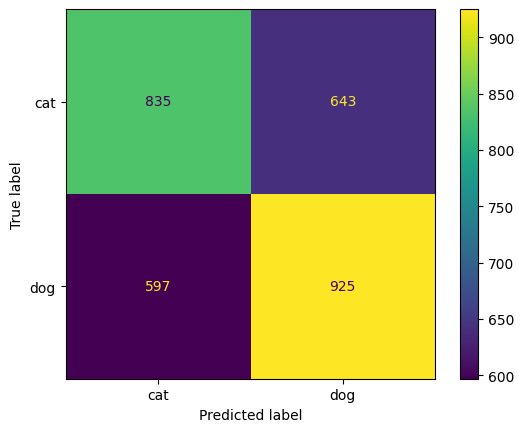

Gradient Boosting
Accuracy: 0.5946666666666667


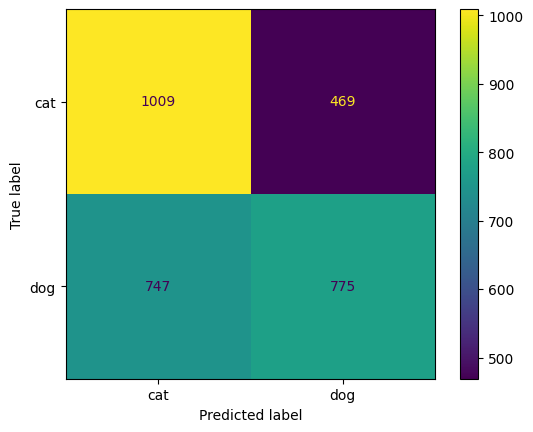

Naive Bayes
Accuracy: 0.586


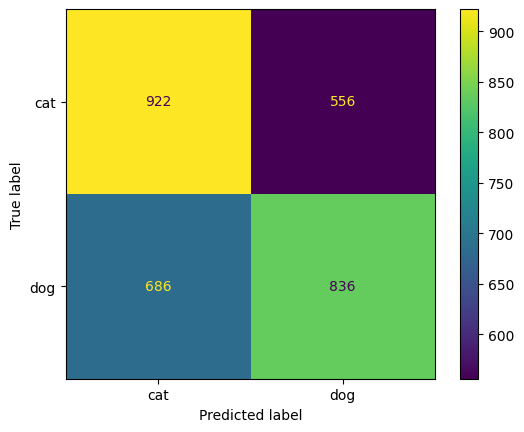

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train three model
print("Random Forest")
rf_m3 = get_random_forest_predictions(X_train, X_val, y_train, y_val)

print("Gradient Boosting")
gb_m3 = get_gradient_boosting_predictions(X_train, X_val, y_train, y_val)

print("Naive Bayes")
nb_m3 = get_naive_bayes_predictions(X_train, X_val, y_train, y_val)

In [ ]:
''' feature extraction - test data''''
features_test = get_features_m3(test_images)
print(features_test.shape)

''' get model predictions '''
predictions = rf_m3.predict(features_test)
print(predictions)

''' Print predictions '''
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Image {i+1}: Predicted label - {prediction}")

(1000, 40000)
['dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog'
 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog'
 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat'
 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 

## FM4
*   Preprocessing - gray scaling
*   Features - HOG features
*   Algorithm - Random forest, Gradiant Boosting and Naive bayes.

In [ ]:
def get_features_m4(images): # method to get image features
  features_list = []
  for img in images: #list of images
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # image preprocessing
    img_resized = cv2.resize(img_grayscaled, (64, 128)) # Resize image if necessary
    # feature extraction
    features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
features_train = get_features_m4(train_images) # feature extraction
print(features_train.shape)


(10000, 3780)


Random Forest
Accuracy: 0.7


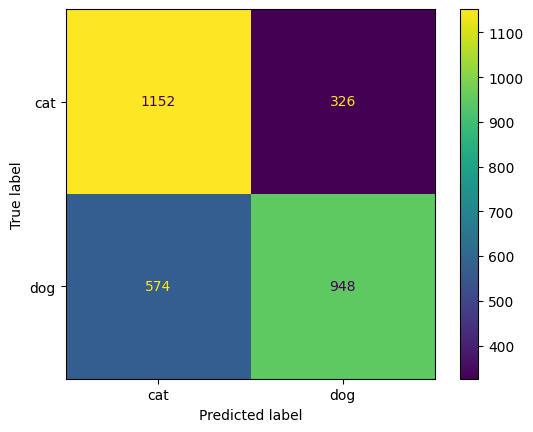

Gradient Boosting
Accuracy: 0.7203333333333334


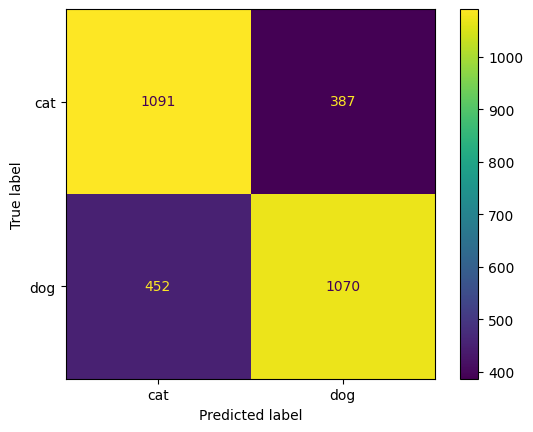

Naive Bayes
Accuracy: 0.676


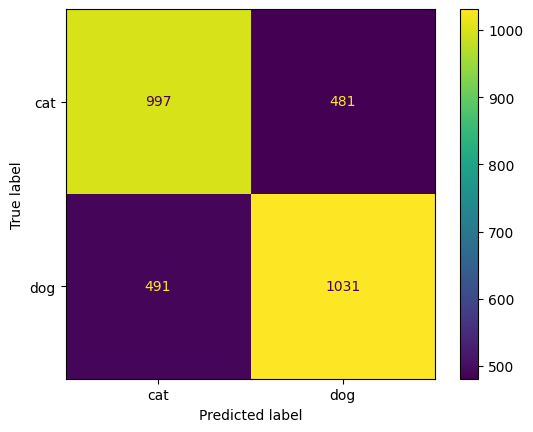

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model

print("Random Forest")
rf_m4 = get_random_forest_predictions(X_train, X_val, y_train, y_val)

print("Gradient Boosting")
gb_m4 = get_gradient_boosting_predictions(X_train, X_val, y_train, y_val)

print("Naive Bayes")
nb_m4 = get_naive_bayes_predictions(X_train, X_val, y_train, y_val)

## FM5
Let's attempt to merge or integrate features.

*   Preprocessing - gray scaling
*   Features - image vector + edge map vector
*   Algorithm - Random forest, Gradiant Boosting and Naive bayes.





In [ ]:
def get_features_m5(images): # method to get image features
  features_list = []
  for img in images:
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # image preprocessing
    # added edges canny and feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200)
    features1 = img_grayscaled.flatten()
    features2 = edges_canny.flatten()
    features = np.hstack((features1, features2))
    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
features_train = get_features_m5(train_images) # feature extraction
print(features_train.shape)

(10000, 80000)


In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

Random Forest
Accuracy: 0.6326666666666667


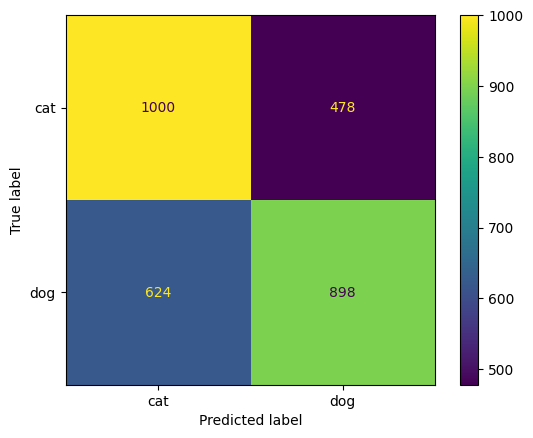

Gradient Boosting
Accuracy: 0.6336666666666667


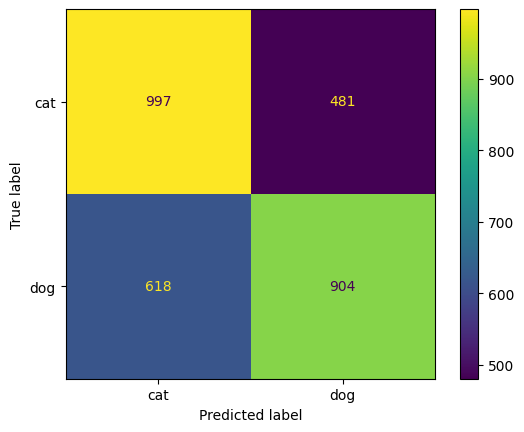

Naive Bayes
Accuracy: 0.5803333333333334


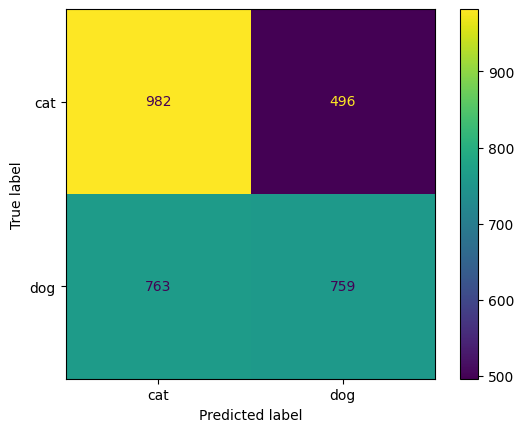

In [ ]:
# train three models

print("Random Forest")
rf_m5 = get_random_forest_predictions(X_train, X_val, y_train, y_val)

print("Gradient Boosting")
gb_m5 = get_gradient_boosting_predictions(X_train, X_val, y_train, y_val)

print("Naive Bayes")
nb_m5 = get_naive_bayes_predictions(X_train, X_val, y_train, y_val)

# Best Model
**Gradient Boosting Classifier from FM4**:

Gradient Boosting has the highest accuracy in this classification. In this section, it predict labels for the test data based on the extracted features. The predictions are stored in the predictions variable.

In [ ]:
# feature extraction - test data
features_test = get_features_m4(test_images)
print(features_test.shape)

# get model predictions
predictions = gb_m4.predict(features_test)
print(predictions)

# Print predictions
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"id {i+1}: prediction - {prediction}")


(1000, 40000)
['dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog'
 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog'
 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog'
 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat'
 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog'
 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat'
 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat'
 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 

Convert the prediction result into CSV file.

In [ ]:
output_csv = '/content/drive/MyDrive/Python/Dataset fot 2nd task/predictions.csv' # Save predictions to CSV file
predictions_df = pd.DataFrame({'id': np.arange(1, len(predictions) + 1), 'prediction': predictions})
predictions_df.to_csv(output_csv, index=False)

Used 'Professor Hansi' [code](https://github.com/HHansi/Applied-AI-CodaLab/blob/master/image-processing/format_submission.py) to convert the CSV file to JSON file.

In [ ]:
# Created by Hansi at 12/19/2022
import json

import pandas as pd

test_file_path = "/content/drive/MyDrive/Python/Dataset fot 2nd task/predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 'dog'}, {'id': 2, 'prediction': 'cat'}, {'id': 3, 'prediction': 'dog'}, {'id': 4, 'prediction': 'dog'}, {'id': 5, 'prediction': 'cat'}]


# Conclusion

The top-performing machine learning model is the ***Gradient Boosting model***, boasting the highest accuracy among all the different featuring models considered.

With our latest insights, the table has been updated as follows:

|Model | Preprocessing | Features   | Accuracy|
|------|---------------|------------|---------|
|FM1    | gray scaling   | image vector | 0.634 |
|FM2    | gray scaling, smoothing| image vector | 0.635 |
|FM3    | gray scaling | edge map to vector | 0.594 |
|**FM4**    | **gray scaling** | **HOG features** | **0.720** |
|FM5    | gray scaling | image vector + edge map vector | 0.633 |

It is evident that FM4, leveraging HOG features, stands out with the highest accuracy among the models considered.